In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import bfunc

Models

from: https://github.com/will-henney/mariano-velocity-statistics

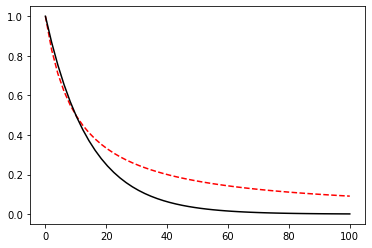

In [23]:
#Auto correlation functions
#parameters
m = 1.0
sig2 = 100 #(km/s)^2
r0 = 10 #pc
r = np.linspace(0, 100)

#original
C0 = 1/(1 + (r/r0)**m)
plt.plot(r,C0,linestyle='dashed',color='r')
#modified
C1 = 2 **-((r/r0)**m)
plt.plot(r,C1,color='k')


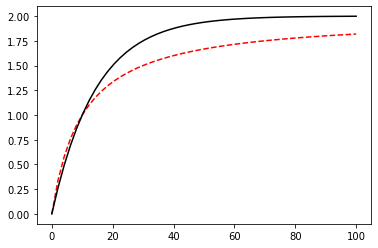

In [24]:
#Second-order structure functions

B0 =  2 - 2 * C0
B1 =  2 - 2 * C1

plt.plot(r,B0,linestyle='dashed',color='r')
plt.plot(r,B1,color='k')

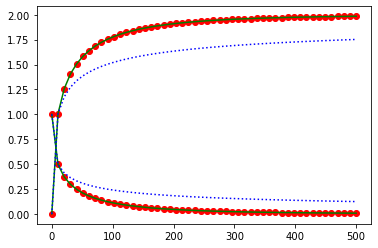

In [31]:
m = 0.5
L = 100 #pc
sig = 1
r0 = 0.1*L #pc

r = np.linspace(0, 500)

C1 = np.exp(-np.log(2) * (r / r0) ** m)
C2 = 2 **-((r/r0)**m)
C3 = 1/(1 + (r/r0)**m) 

B1 =  2 - 2 * C1
B2 =  2 - 2 * C2
B3 =  2 - 2 * C3

plt.plot(r,C1,color='green')
plt.scatter(r,C2,color='red')
plt.plot(r,C3,linestyle='dotted',color='blue')

plt.plot(r,B1,color='green')
plt.scatter(r,B2,color='red')
plt.plot(r,B3,linestyle='dotted',color='blue')



C:\Users\ZAINTEL2\Documents\Aeon\GitHub\PhD.Paper\SFalgorithm\bfunc.py:29: RuntimeWarning: divide by zero encountered in true_divide
  return seeing_large_scale(s0, r0) / (1 + (2 * s0 / r) ** a)
C:\Users\ZAINTEL2\Documents\Aeon\GitHub\PhD.Paper\SFalgorithm\bfunc.py:29: RuntimeWarning: divide by zero encountered in true_divide
  return seeing_large_scale(s0, r0) / (1 + (2 * s0 / r) ** a)
<ipython-input-30-18ea8a9553d7>:27: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(


[(10, 500.0), (1.6799413346796823, 50.0)]

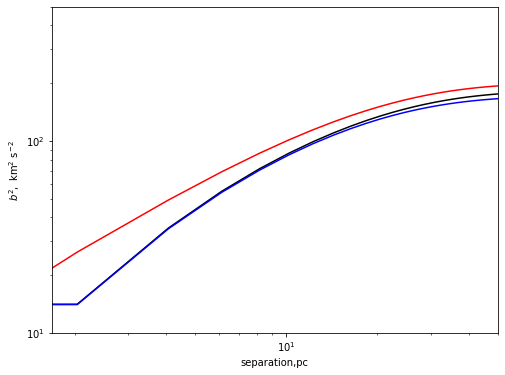

In [30]:
#Modified functions

#parameters
m = 1.0
sig2 = 100 #(km/s)^2
r0 = 10 #pc
#nuisance parameters
noise = 2.0
s0 = 1 #pc
L = 100
box_size = L

rgrid = np.linspace(0, L)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(rgrid, bfunc.bfunc00s(rgrid, r0, sig2, m), color="red")
ax.plot(rgrid, bfunc.bfunc03s(rgrid, r0, sig2, m, s0, noise), color="k")
ax.plot(rgrid, bfunc.bfunc04s(rgrid, r0, sig2, m, s0, noise, box_size), color="blue")


ax.set(xscale='log', yscale='log', 
       xlabel='separation,pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

ax.set(
    xlim=[0, L/2], ylim=[10, 500.0],
)

In [4]:
#def seeing_large_scale(s0, r0):
#    return np.exp(-s0 / r0) 

#def seeing_empirical(r, s0, r0, a=1.5):
#    """
#    Simplified version of empirical fit to B(r) reduction from seeing
#    """
#    return seeing_large_scale(s0, r0) / (1 + (2 * s0 / r)**a)

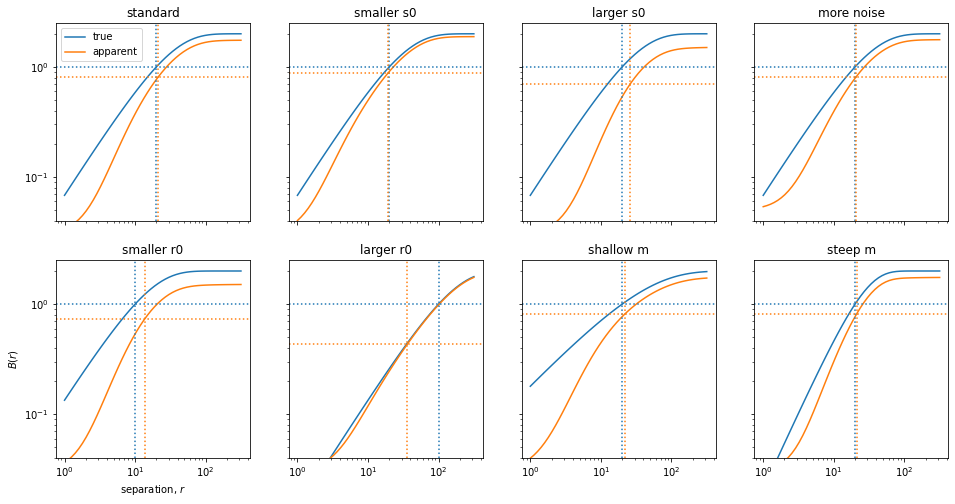

In [5]:
fig, axes = plt.subplots(
    2, 4, 
    sharex=True, sharey=True,
    figsize=(16, 8),
)
r = np.logspace(0.0, 2.5)
box_size = 212.0
sig2 = 1.0

for (r0, s0, m, noise, label), ax in zip([
        [20.0, 3.0, 1.0, 0.03, "standard"],
        [20.0, 1.5, 1.0, 0.03, "smaller s0"],
        [20.0, 6.0, 1.0, 0.03, "larger s0"],
        [20.0, 3.0, 1.0, 0.05, "more noise"],
        [10.0, 3.0, 1.0, 0.03, "smaller r0"],
        [100.0, 3.0, 1.0, 0.03, "larger r0"],
        [20.0, 3.0, 0.667, 0.03, "shallow m"],
        [20.0, 3.0, 1.4, 0.03, "steep m"],
], axes.flat):
    true_b = ax.plot(
        r, bfunc.bfunc00s(r, r0, sig2, m),
        label="true",
    )
    c_true = true_b[0].get_color()
    app_b = ax.plot(
        r, 
        bfunc.bfunc03s(r, r0, sig2, m, s0, noise),
        label="apparent",
    )
    c_app = app_b[0].get_color()
    
    ax.axhline(sig2, color=c_true, linestyle="dotted")
    ax.axvline(r0, color=c_true, linestyle="dotted")
    
    
    sig2_app = bfunc.finite_box_effect(r0, box_size) * bfunc.seeing_large_scale(s0, r0) * sig2
    rr, bb = app_b[0].get_data()
    r0_app = np.interp(sig2_app, bb, rr)
    
    ax.axhline(sig2_app, color=c_app, linestyle="dotted")
    ax.axvline(r0_app, color=c_app, linestyle="dotted")
    ax.set_title(label)
axes[0, 0].legend()             
axes[-1, 0].set(
    xscale="log",
    yscale="log",
    ylim=[0.04, 2.5],
    xlabel=r"separation, $r$",
    ylabel=r"$B(r)$",
);